# 消息传递
### 问题：
● 什么是基本的通信原语？

● 点到点的通信是什么?

### 目标:
● 编写您的第一个MPI程序

● 了解通信原语

最常用的编程分布式内存MIMD系统的方法是消息传递，或者是消息传递的某种变体。MPI是使用最广泛的标准。

在基本的消息传递中，进程通过显式地发送和接收消息来协调它们的活动。显式发送和接收消息被称为点到点的通信。

MPI用下面的操作方式发送和接收：

● 首先，进程A决定需要发送的消息给进程B。

● 进程A将所有必需的数据打包进入进程B的缓冲区。

● 进程A指示数据应该通过调用Send函数发送到进程B。

● 在进程B接收到数据之前，通过调用Recv函数来承认它想要接收数据。

通过这种方式，每当一个进程发送一条消息时，必须有另外一个进程，它也表明自身想要接收消息。也就是说，发送和Recv的调用总是成对的。

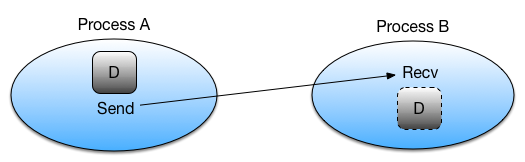

# 一个进程如何知道在哪里发送消息？
当MPI程序第一次启动时，进程的数量是固定的（有一种方法可以创建更多的进程，但是我们现在就忽略它）。每一个进程都被分配一个从0开始惟一的整数。这个整数被称为进程的秩，是在发送和接收消息时识别每个进程的。

MPI进程被安排在逻辑集合中，定义哪些进程可以发送和接收消息。这种类型的集合称为通信器。通信器可以在层次结构中进行排列，但是因于这在MPI中很少使用，所以我们不会在这里多做考虑。当MPI程序启动时，存在一个特殊的通信器，它包含MPI程序中的所有进程。这个通讯器叫做MPI.COMM_WORLD。在mpi4py中，通信器由Comm类表示。

为了让一个进程了解其他进程，MPI提供了两种通信方法。

第一种方法叫做Get_size()，返回通信器中包含的进程总数（通信器的大小）。

第二种方法叫做Get_rank()，返回通信者中调用进程的级别。请注意Get_rank()将为MPI程序中的每个进程返回一个不同的值。

# 术语
为简单起见，我们认为“进程等级为N”和“进程N”为相同的进程。

下面的代码获得MPI.COMM_WORLD通信器的大小，和在通信器内的进程的等级。我们会创建一个名为mpi1.py的文件，并运行这段代码，来查看每个进程的大小和等级的值。

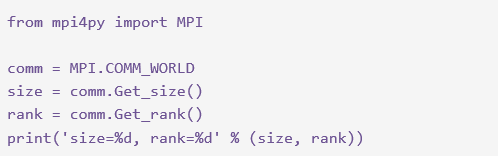

现在使用以下命令运行程序：mpiexec -n 4 python mpi1.py

您应该会看到类似于下面的输出：

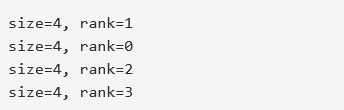

你要注意到程序输出这些值的顺序是什么？提示：尝试运行这个程序几次，看看会发生什么。

# mpiexec
mpiexec命令是如何启动MPI程序的。-n参数指定要启动多少进程（任务）。用比程序期望的更多或更少的进程启动MPI是可能的，因此设计代码总是一个好主意这样它就可以接受任意数量的进程。或者，检查已经启动了多少进程，并且只有在您所期望的数字。

# 一个MPI程序，多个MPI进程
当一个MPI程序运行时，每个进程由相同的代码组成。然而，正如我们所看到的，有且只有一个，区别：每个进程被分配一个不同的等级值。这允许将每个进程的代码嵌入到一个程序文件中。

在下面的代码中，所有的进程都以相同的两个数字a和b开始，但是，尽管只有一个文件，但是每个进程在数字上执行不同的计算。进程0打印数字的和，进程1打印数字相乘的结果，进程2打印最大值。

创建一个名为mpi2.py 包含下面代码的程序。

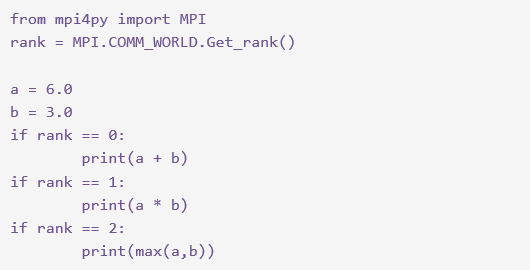

使用以下命令运行这个程序：mpiexec -n 3 python mpi2.py

您应该会看到类似于下面的输出：

9.0

18.0

6.0

# 挑战
修改上面的程序以添加语句print（MPI的末尾）作为最后一行。当你运行程序时，会发生什么？如果将进程数增加到4，会发生什么？你能解释一下你所看到的吗？

# 点对点通信
正如前面提到的，最简单的消息传递涉及两个进程：发送方和接收方。让我们首先展示一个为两个过程设计的程序。一个人会画一个随机数，然后把它发送给另一个。我们将使用例程Send 和Recv来做这件事。

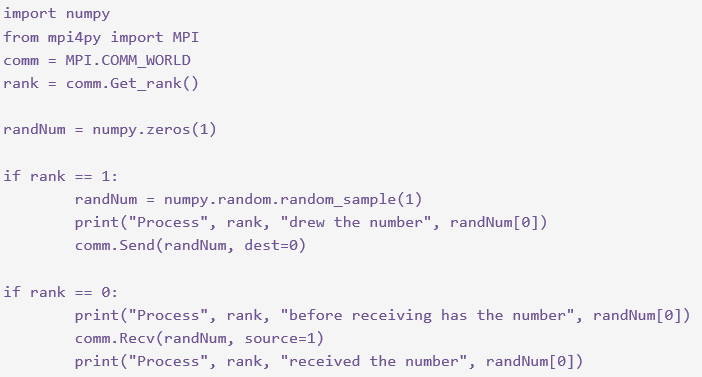

使用以下命令运行这个程序：mpiexec -n 2 python mpi3.py

这个程序产生以下输出：
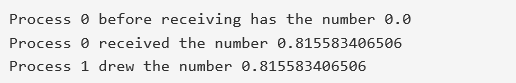

Send和Recv函数被称为阻塞函数（稍后我们将讨论非阻塞函数）。如果一个进程调用Recv，它将简单地等待，直到收到来自相应发送的消息,然后再继续执行。类似地，发送将一直等待，直到消息被相应的Recv重新启动。

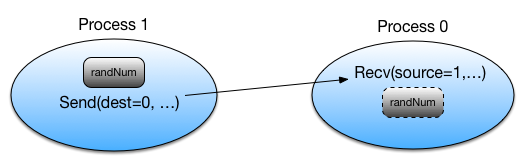

# 死锁
因为Send和Recv是阻塞函数，一个很常见的情况叫做死锁。当一个进程等待一个从未发送的消息时，就会发生这种情况。我们可以通过注释掉下面的程序来查看一个简单的例子。

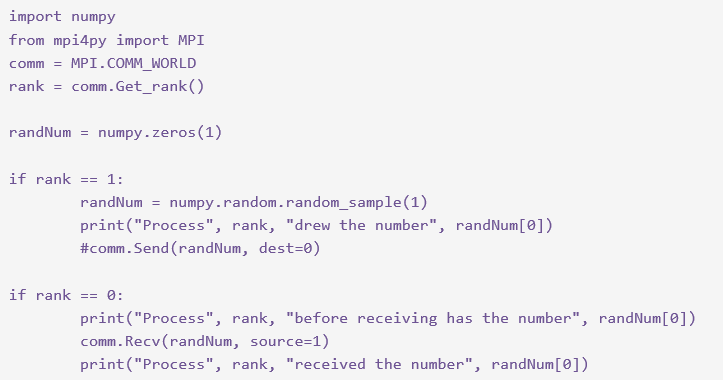

当你运行这段代码时，你看到了什么？ 

当程序陷入僵局时，您需要使用^C（Control-C）来终止程序，以便继续。 

注意，程序导致死锁是多么容易！我们只需要改变一种语法来实现这一目标。

# 更多的Send和Recv
在此之前，我们看到了如何将消息从一个进程发送到另一个进程。现在我们要试着发送一条消息到一个进程并再次接收另一条消息。

让我们修改前面的代码，以便当进程0收到数字时，它将其乘以2，并将其发送回进程1。进程1应该打印出新的值。

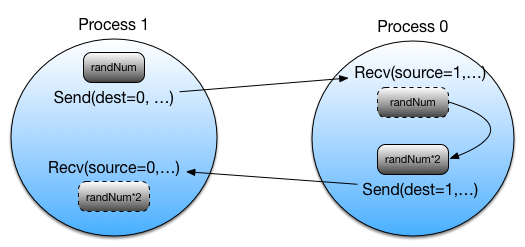

用以下代码创建一个名为mpi4.py 的新程序：
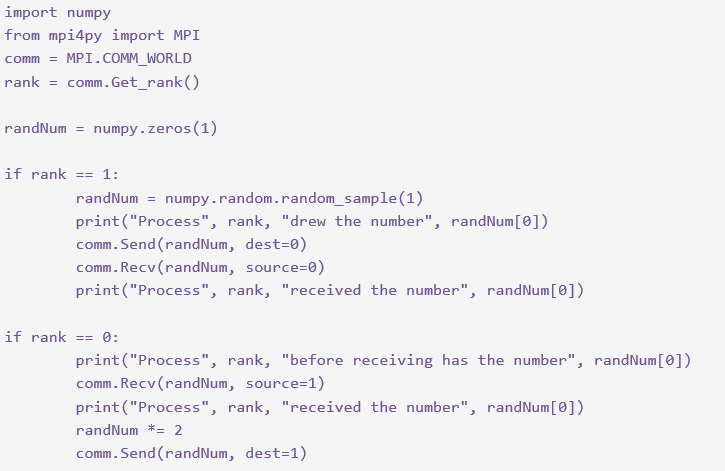

使用以下命令运行这个程序：mpiexec -n 2 python mpi4.py

您会看到下面的输出：
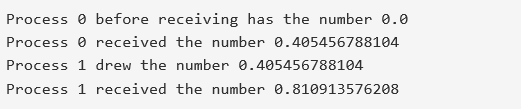

# 关于Send和Recv方法的最后一个知识点
以下是Send和Recv方法的实际定义：
### Comm.Send(buf, dest=0, tag=0)
执行一个基本的发送。这个发送是点对点通信。它将信息从一个进程发送到另一个进程。

参数：

● Comm (MPI comm)—我们想要查询的通信器

● buf (choice)—发送数据

● dest (integer)—终点等级

● tag (integer)—消息标签
### Comm.Recv(buf, source=0, tag=0, status=None)
执行点对点的数据接收。

参数：

● Comm (MPI comm)—我们想要查询的通信器

● buf (choice)—接收缓冲区的初始地址（选择接收位置）

● source (integer)—来源等级

● tag (integer)—消息标签 

● status (Status)—对象状态

有时，在一些些情况下，进程可能不得不向另一个进程发送许多不同类型的消息。MPI不需要通过额外的度量来区分所有这些消息，而是允许发送方和接收方也通过消息指定消息IDs（称为标记）。接收进程可以请求带有特定标记号的消息，并且带有不同标记的消息将被缓冲，直到进程请求它们为止。

# ！关键点
● MPI使用等级的概念来区分进程

● Send和Recv是最基本的原语。

● 将消息从一个进程发送到另一个进程称为点对点通信。